In [32]:
#Nicholas Wolanske
#06.11.21
#Saks Internship

#Referenced Medium Article:https://medium.com/analytics-vidhya/using-data-science-to-analyze-the-premier-league-b468c5b836ba

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [64]:
football_results = pd.read_csv('http://www.football-data.co.uk/mmz4281/2021/E0.csv')
football_results.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


Text(0, 0.5, 'Frequency')

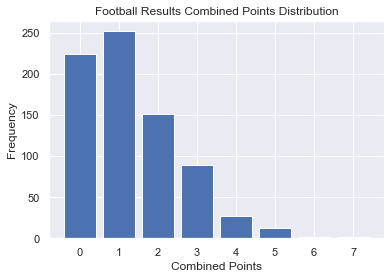

In [65]:
#1 - Basic Test Graph
fig, ax = plt.subplots() 

#Summing Home and Away Goals
data = (football_results['FTHG'].value_counts() + football_results['FTAG'].value_counts())

points = data.index 
frequency = data.values 

#Plotting the data
ax.bar(points, frequency) 
 
ax.set_title('Football Results Combined Points Distribution') 
ax.set_xlabel('Combined Points') 
ax.set_ylabel('Frequency')

In [57]:
hometeam = football_results.loc[:,['HomeTeam','FTHG']]
hometeam = hometeam.groupby('HomeTeam',as_index = False)['FTHG'].sum().sort_values(by = 'FTHG', ascending=True)
hometeam

,HomeTeam,FTHG
7,Fulham,9
14,Sheffield United,12
3,Burnley,14
17,West Brom,15
5,Crystal Palace,20
19,Wolves,21
2,Brighton,22
0,Arsenal,24
6,Everton,24
13,Newcastle,26


Text(0.5, 1.0, 'Home Team Goals by Team')

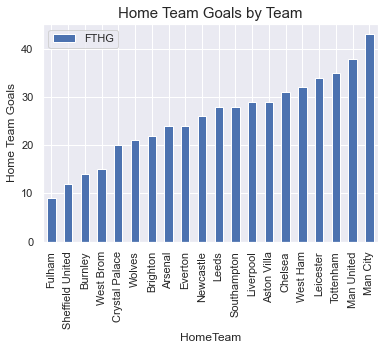

In [59]:
#Number of Home Team Goals
hometeam.plot(kind= 'bar', x = 'HomeTeam', y='FTHG')
plt.ylabel('Home Team Goals')
plt.xticks(rotation=90)
plt.title('Home Team Goals by Team',fontsize=15)

In [74]:
#Number of Away Team Goals
awayteam = football_results.loc[:,['AwayTeam','FTAG']]
awayteam = awayteam.groupby('AwayTeam',as_index = False)['FTAG'].sum().sort_values(by = 'FTAG', ascending=True)
awayteam

,AwayTeam,FTAG
14,Sheffield United,8
19,Wolves,15
2,Brighton,18
7,Fulham,18
3,Burnley,19
15,Southampton,19
17,West Brom,20
13,Newcastle,20
5,Crystal Palace,21
6,Everton,23


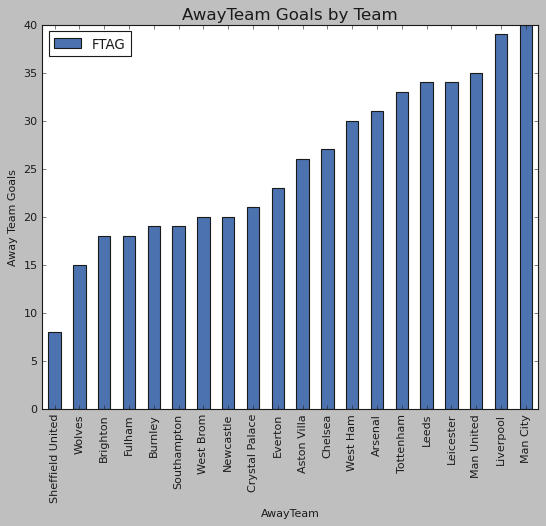

In [79]:
# plotting the DF
awayteam.plot(kind= 'bar', x = 'AwayTeam', y='FTAG')
plt.style.use('classic')
plt.ylabel('Away Team Goals')
plt.xticks(rotation=90)
plt.title('AwayTeam Goals by Team',fontsize=15)
plt.rcParams.update({'font.size':10})

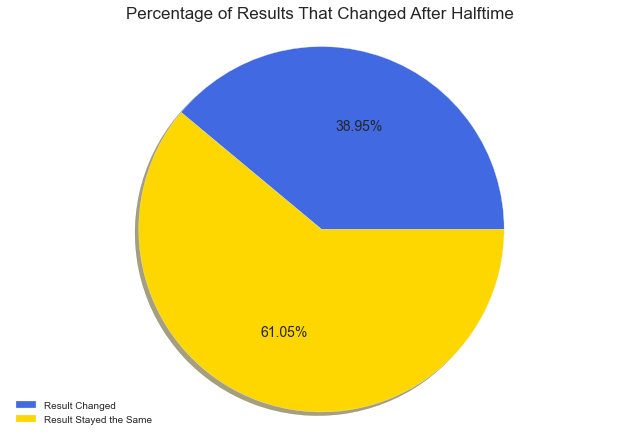

In [71]:
#Trimming data to HTR and FTR
result = football_results.loc[:,['FTR','HTR']]

#Number of Same Results
resultSame = result[result['FTR']== result['HTR']].reset_index().sort_index()

result.index += 1
resultSame.index += 1

# Finding the number of same results
resultSame = resultSame.index.values[-1]

# Finding the number of total results
result = result.index.values[-1]

# Finding the difference of the two
result = result - resultSame 


# Getting the parameters ready for the pie chart
data = [result,resultSame]
labels1 = ['Result Changed', 'Result Stayed the Same']
colors = ['royalblue','gold']

# Plotting the pie chart
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, explode = None,autopct='%.2f%%', colors= colors,shadow = True) 
plt.style.use('seaborn')
plt.title('Percentage of Results That Changed After Halftime',fontsize=17)
plt.axis('equal')
plt.legend(labels1, loc='lower left')

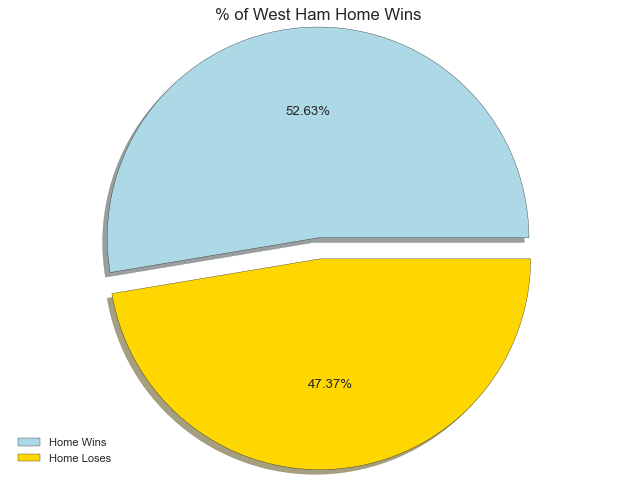

In [143]:
#Trimming data to HTR and FTR
WestHam = football_results.loc[:,['HomeTeam','AwayTeam','FTR']]
WestHamHome = WestHam[WestHam['HomeTeam']=="West Ham"]
WestHamAway = WestHam[WestHam['AwayTeam']=="West Ham"]

homeResults = WestHamHome[WestHamHome['FTR'] == 'H']
homeResults.reset_index()
homeWins = len(homeResults.index)
homeLoses = len(WestHamHome.index) - homeWins

list2 = [homeWins,homeLoses]
labels2 = ['Home Wins', 'Home Loses']
colors2 = ['lightblue','gold']

fig = plt.figure(figsize =(10, 7)) 
plt.pie(list2, explode = [0,0.1],autopct='%.2f%%', colors= colors2,shadow = True) 
plt.style.use('seaborn')
plt.title('% of West Ham Home Wins',fontsize=15)
plt.axis('equal')
plt.legend(labels2, loc='lower left')